In [ ]:
import pandas as pd # can read the csv file , pre processing , remove null value
import numpy as np # any numerical data and get mean etc
import seaborn as sns # used to visualize data
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler #for all ML terms and lib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm,datasets
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold,LeaveOneOut,ShuffleSplit
from sklearn import datasets

In [ ]:
df = pd.read_csv("/content/water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.318980,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057860,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541730,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417440,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.986340,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
1499,6.149185,150.563593,20596.391230,6.906911,NaN,431.651283,12.829380,64.394907,4.275615,1
1500,7.080446,196.658947,36966.853320,8.986784,294.315733,530.052919,13.822057,85.777222,2.664946,1
1501,6.628427,215.245532,18059.330850,6.931787,NaN,374.455062,11.621074,77.940822,3.405279,1
1502,4.704698,160.211822,5128.457646,8.283069,357.731077,344.693740,14.219532,34.288413,4.109925,1


In [ ]:
df.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Pre Processing

In [ ]:
df.describe()
#25% data what we get mean etc
#null

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1296.000000,1504.000000,1504.000000,1504.000000,1144.000000,1504.000000,1504.000000,1432.000000,1504.000000,1504.000000
mean,7.071248,196.505047,22032.769448,7.074701,331.940037,425.567020,14.256470,67.262746,3.959677,0.430851
std,1.528015,32.261028,8980.026551,1.616292,43.693084,80.240116,3.300428,16.126828,0.788224,0.495360
min,0.227499,47.432000,1372.091043,0.530351,129.000000,181.483754,2.200000,8.175876,1.492207,0.000000
25%,6.115523,177.091694,15489.233433,5.983098,305.796135,364.067188,11.974058,57.232130,3.424484,0.000000
50%,7.016084,196.654385,20841.742510,7.048265,330.896608,420.177988,14.181933,67.221231,3.963862,0.000000
75%,7.987806,215.505789,27581.218320,8.112651,359.298320,480.904432,16.524426,77.921066,4.496852,1.000000
max,13.175402,323.124000,56488.672410,13.127000,476.539717,695.369528,28.300000,120.030077,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1296 non-null   float64
 1   Hardness         1504 non-null   float64
 2   Solids           1504 non-null   float64
 3   Chloramines      1504 non-null   float64
 4   Sulfate          1144 non-null   float64
 5   Conductivity     1504 non-null   float64
 6   Organic_carbon   1504 non-null   float64
 7   Trihalomethanes  1432 non-null   float64
 8   Turbidity        1504 non-null   float64
 9   Potability       1504 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 117.6 KB


In [ ]:
#CHECKnull
df.isnull().sum()

ph                 208
Hardness             0
Solids               0
Chloramines          0
Sulfate            360
Conductivity         0
Organic_carbon       0
Trihalomethanes     72
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

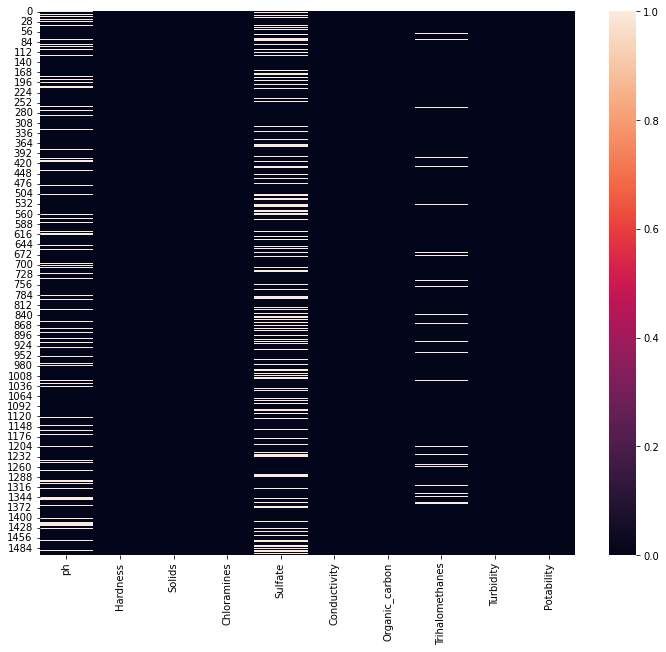

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df.isnull())
#Null VAl

Correlation is a statistical measure that expresses the extent to which two variables are linearly related

between one to portability


<AxesSubplot:>

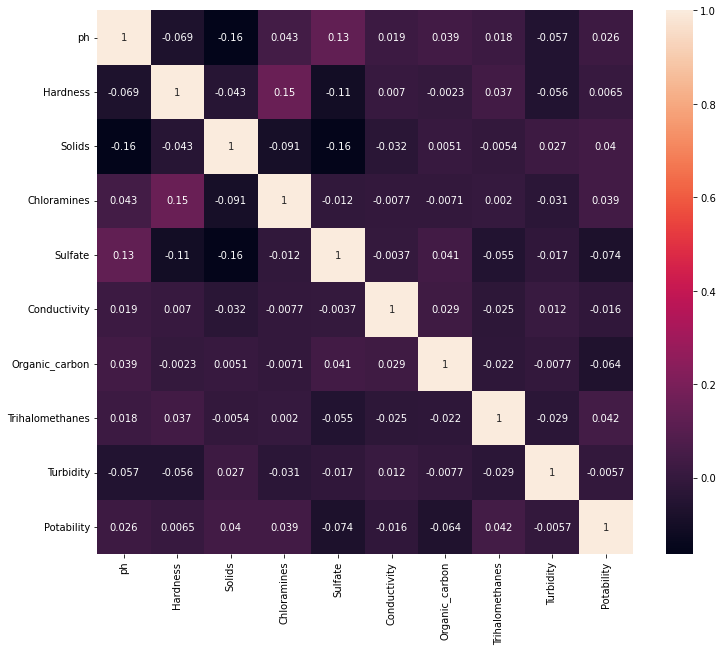

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)#which features has highest corrilation to the target
# 1 means same num of row

<AxesSubplot:xlabel='Potability', ylabel='count'>

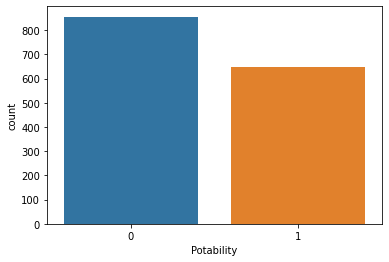

In [ ]:
sns.countplot(x="Potability",data=df)
#checking how many potable water

In [ ]:
df["Potability"].value_counts()

0    856
1    648
Name: Potability, dtype: int64

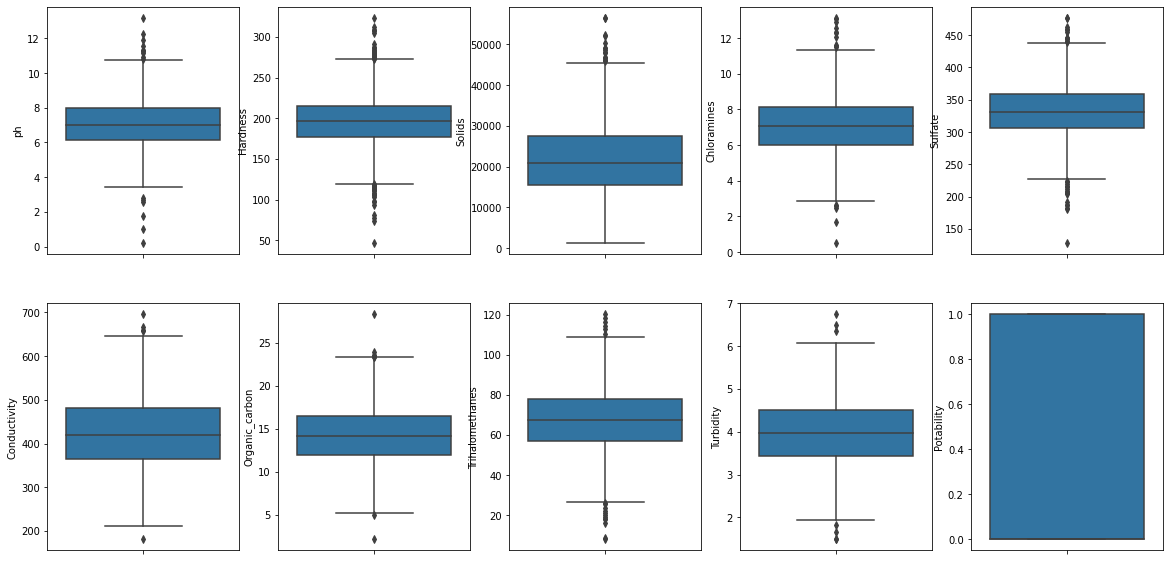

In [ ]:
# visualization data
#check outliers

fig,ax= plt.subplots(ncols = 5,nrows = 2, figsize =(20,10))
ax = ax.flatten()#2d to 1d
index=0
for col,values in df.items():
  sns.boxplot(y=col,data = df, ax=ax[index])
  index +=1


In [ ]:
#sns.pairplot(df)

In [ ]:
fig = px.pie(df,names="Potability",hole = 0.4,template = "plotly_dark")
fig.show()

In [ ]:
fig = px.scatter(df,x="ph",y="Sulfate",color="Potability")
fig.show()

In [ ]:
fig = px.scatter(df,x="Organic_carbon",y="Hardness",color="Potability",template="plotly_dark")
fig.show()

Text(0, 0.5, 'Percentage of missing values')

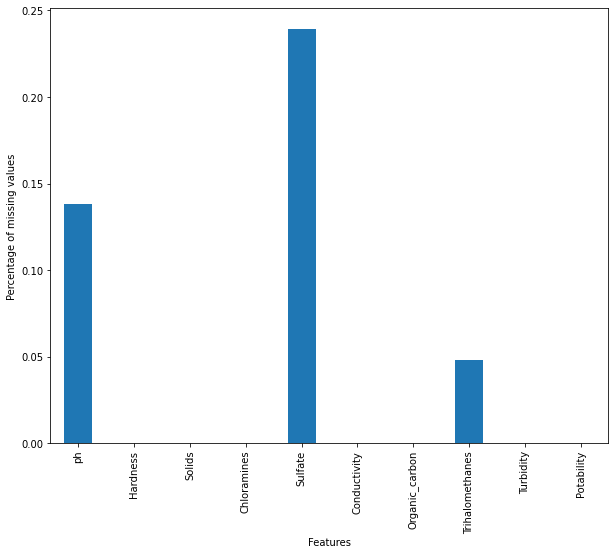

In [ ]:
df.isnull().mean().plot.bar(figsize =(10,8))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [ ]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Preparing the data

In [ ]:
df.head()
#keep everything on same scale exept out

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.071248,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,331.940037,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,331.940037,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
x = df.drop("Potability",axis = 1)#the features
y = df["Potability"]#the target

In [ ]:
x.shape,y.shape
#no of row and features

((1504, 9), (1504,))

In [ ]:

scaler = StandardScaler()
#x-mean/standard deviation eve betweeen -1 to 1
x = scaler.fit_transform(x)#calculate mean and apply for all col
x


array([[-6.26414249e-16,  2.60010238e-01, -1.38291728e-01, ...,
        -1.17499185e+00,  1.25413170e+00, -1.26470887e+00],
       [-2.36633188e+00, -2.08004651e+00, -3.79046026e-01, ...,
         2.79918273e-01, -6.95058083e-01,  6.86554733e-01],
       [ 7.24940346e-01,  8.59874525e-01, -2.36517556e-01, ...,
         7.91726220e-01, -5.35678463e-02, -1.14693872e+00],
       ...,
       [-3.12312346e-01,  5.81094886e-01, -4.42622323e-01, ...,
        -7.98766724e-01,  6.78809879e-01, -7.03586089e-01],
       [-1.66907936e+00, -1.12536080e+00, -1.88306062e+00, ...,
        -1.11955917e-02, -2.09619253e+00,  1.90678363e-01],
       [ 6.38738718e-01,  1.18678993e+00, -7.43222028e-01, ...,
        -1.97604554e-02, -1.16631806e+00,  1.00757500e+00]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
x_train.shape,x_test.shape

((1052, 9), (452, 9))

In [ ]:
#logistic regression

# object of LR
model = LogisticRegression()

In [ ]:
#Training MOD
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#predict Mke
pred = model.predict(x_test)

In [ ]:
#accuracy score
accuracy_score_lg = accuracy_score(y_test,pred)
accuracy_score_lg*100

58.62831858407079

In [ ]:
#Decision Tree Classifier

In [ ]:
#model_dt = DecisionTreeClassifier(max_depth = 8  ,random_state = 100 )
#train
model_dt = DecisionTreeClassifier(criterion = "entropy", splitter = "best", max_depth = 8,  min_samples_split = 6,
                              min_samples_leaf = 4, max_features = 9)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=9,
                       min_samples_leaf=4, min_samples_split=6)

In [ ]:
#pred
pred_dt = model_dt.predict(x_test)
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

59.070796460176986

In [ ]:
#confusion matrix
cm2 = confusion_matrix(y_test,pred_dt)
cm2
# 386 correct classifed as 0 and 16 is wrong classifed as 0
# 235 correct classifed as 1 and 19 is wrong classifed as 1

array([[213,  36],
       [149,  54]])

In [ ]:
"""
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold,LeaveOneOut,LeavePOut
from sklearn import datasets
#X, y = datasets.water_potability.csv(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=2)

scores = cross_val_score(clf, x_train,y_train, cv = lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
"""


'\nfrom sklearn.model_selection import KFold, cross_val_score,StratifiedKFold,LeaveOneOut,LeavePOut\nfrom sklearn import datasets\n#X, y = datasets.water_potability.csv(return_X_y=True)\n\nclf = DecisionTreeClassifier(random_state=42)\n\nlpo = LeavePOut(p=2)\n\nscores = cross_val_score(clf, x_train,y_train, cv = lpo)\n\nprint("Cross Validation Scores: ", scores)\nprint("Average CV Score: ", scores.mean())\n'

In [ ]:
"""
#X, y = datasets.water_potability.csv(return_X_y=True)

clf = DecisionTreeClassifier(random_state=20)

ss = ShuffleSplit(train_size=0.6, test_size=0.4, n_splits = 5)

scores = cross_val_score(clf, x, y, cv = ss)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
"""

'\n#X, y = datasets.water_potability.csv(return_X_y=True)\n\nclf = DecisionTreeClassifier(random_state=20)\n\nss = ShuffleSplit(train_size=0.6, test_size=0.4, n_splits = 5)\n\nscores = cross_val_score(clf, x, y, cv = ss)\nprint("Cross Validation Scores: ", scores)\nprint("Average CV Score: ", scores.mean())\n'

In [ ]:
#sns.heatmap(cm2/np.sum(cm2))

RANDOM FOREST CLASSIFIER

In [ ]:
#create object
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model_rf = RandomForestClassifier(max_depth = 14 , random_state = 12,n_estimators=30)
model_rf.fit(x_train,y_train)
#train RF

RandomForestClassifier(max_depth=14, n_estimators=30, random_state=12)

In [ ]:
#predict
pred_rf = model_rf.predict(x_test)
accuracy_score_rf = accuracy_score(y_test , pred_rf)
accuracy_score_rf*100

63.45514950166113

In [ ]:

#confussion matrix
cm3 = confusion_matrix(y_test,pred_rf)
cm3
# 367 correct classifed as 0 and 35 is wrong classifed as 0
# 169 correct classifed as 1 and 85 is wrong classifed as 1

array([[133,  27],
       [ 83,  58]])

KNN -- K-Neighbours

In [ ]:
#create object
model_knn = KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
#check for which neighbor u get better accuracy
for i in range(3,25):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(i,accuracy_score_knn)

3 0.6393805309734514
4 0.6393805309734514
5 0.6216814159292036
6 0.6548672566371682
7 0.6526548672566371
8 0.6460176991150443
9 0.668141592920354
10 0.668141592920354
11 0.6526548672566371
12 0.6482300884955752
13 0.661504424778761
14 0.661504424778761
15 0.6415929203539823
16 0.6504424778761062
17 0.6393805309734514
18 0.6438053097345132
19 0.6526548672566371
20 0.6548672566371682
21 0.6548672566371682
22 0.6460176991150443
23 0.6393805309734514
24 0.6504424778761062


In [ ]:
  model_knn = KNeighborsClassifier(n_neighbors=6)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(accuracy_score_knn)

0.6548672566371682


SVM -- support vector machine

In [ ]:
#object
# Kernel Function generally transforms the training set of data so that a non-linear
#decision surface is able to transform to a linear equation in a higher number of dimension spaces
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf',C=1,gamma ='auto')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 23 ,shuffle = True)
#train
model_svm.fit(x_train,y_train)

SVC(C=1, gamma='auto')

In [ ]:

#predict
pred_svm = model_svm.predict(x_test)
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

70.43189368770764

Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#one of the best
model_ada = AdaBoostClassifier(n_estimators = 60,learning_rate = 0.02)

In [ ]:
model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=60)

In [ ]:
pred_ada = model_ada.predict(x_test)

In [ ]:
accuracy_score_ada = accuracy_score(y_test,pred_ada)
accuracy_score_ada*100

60.46511627906976

XGBOOST algorithm

In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators = 100  , learning_rate = 0.06)

In [ ]:
model_xgb.fit(x_train , y_train)

XGBClassifier(learning_rate=0.06)

In [ ]:
pred_xgb = model_xgb.predict(x_test)

In [ ]:
accuracy_score_xgb = accuracy_score(y_test,pred_xgb)
accuracy_score_xgb*100

63.45514950166113

In [ ]:
models = pd.DataFrame({
    "model" : ["Logistic Regression",
               "Decision Tree",
               "Random Forest",
               "KNN",
               "SVM",
               "AdaBoost",
               "XGBoosT"],
    "Accuracy Score" : [accuracy_score_lg ,accuracy_score_dt ,
                          accuracy_score_rf ,accuracy_score_knn ,
                          accuracy_score_svm ,accuracy_score_ada ,
                          accuracy_score_xgb]

})

In [ ]:
models

,model,Accuracy Score
0,Logistic Regression,0.586283
1,Decision Tree,0.590708
2,Random Forest,0.634551
3,KNN,0.654867
4,SVM,0.704319
5,AdaBoost,0.604651
6,XGBoosT,0.634551


,model,Accuracy Score
4,SVM,0.704319
3,KNN,0.654867
2,Random Forest,0.634551
6,XGBoosT,0.634551
5,AdaBoost,0.604651
1,Decision Tree,0.590708
0,Logistic Regression,0.586283


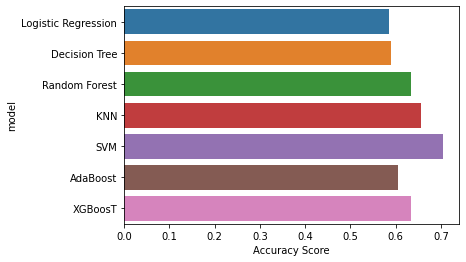

In [ ]:
sns.barplot(x="Accuracy Score", y= "model",data = models)
models.sort_values(by = "Accuracy Score",ascending = False)

In [ ]:
v1=float(input("Enter PH vlaue  :"))
v1

KeyboardInterrupt: ignored

In [ ]:
v2=float(input("Enter Hardness vlaue :"))
v2

In [ ]:
v3=float(input("Enter Solids vlaue  :"))
v3

In [ ]:
v4=float(input("Enter Chloramines vlaue  :"))
v4

In [ ]:
v5=float(input("Enter Sulfate vlaue  :"))
v5

In [ ]:
v6=float(input("Enter Conductivity vlaue  :"))
v6

In [ ]:
v7=float(input("Enter Organic_carbon vlaue :"))
v7

In [ ]:
v8=float(input("Enter Trihalomethanes vlaue :"))
v8

In [ ]:
v9=float(input("Enter Turbidity vlaue :"))
v9

In [ ]:
X_new = [[v1,v2,v3,v4,v5,v6,v7,v8,v9]]
y_pred = model_svm.predict(X_new)
print (y_pred)
if (y_pred==1):
  print ("Potable")
else:
  print(" not Potabley")